In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import random

# Reading the preprocessed dataset
df = pd.read_csv(r"C:\Users\Bindhu\Documents\!Thesis\m5_final\Data\m5_preprocessed_fe.csv", parse_dates=["date"])

In [11]:
# Displaying basic information about the dataset
print("Shape:", df.shape)
display(df.head())
print("\nNumeric summary:")
display(df.describe().T)
print("\nCategorical counts:")
for col in df.select_dtypes(["category","bool"]).columns:
    print(f"\n== {col} ==")
    print(df[col].value_counts(dropna=False))

Shape: (956500, 80)


,id,item_id,dept_id,cat_id,store_id,state_id,sales,date,wday,year,...,month_nb,weekofyear_nb,dayofyear_sin,dayofyear_cos,weekofyear_sin,weekofyear_cos,month_sin,month_cos,weekday_sin,weekday_cos
0,FOODS_1_010_WI_1_validation,FOODS_1_010,FOODS_1,FOODS,WI_1,WI,0.0,2011-01-29,1,2011,...,1,4,0.462383,0.886680,0.348202,0.937420,0.0,1.000000,-0.974928,-0.222521
1,FOODS_1_010_WI_1_validation,FOODS_1_010,FOODS_1,FOODS,WI_1,WI,0.0,2011-01-30,2,2011,...,1,4,0.477536,0.878612,0.348202,0.937420,0.0,1.000000,-0.781831,0.623490
2,FOODS_1_010_WI_1_validation,FOODS_1_010,FOODS_1,FOODS,WI_1,WI,0.0,2011-01-31,3,2011,...,1,5,0.492548,0.870285,0.456629,0.889657,0.0,1.000000,0.000000,1.000000
3,FOODS_1_010_WI_1_validation,FOODS_1_010,FOODS_1,FOODS,WI_1,WI,0.0,2011-02-01,4,2011,...,2,5,0.507415,0.861702,0.456629,0.889657,0.5,0.866025,0.781831,0.623490
4,FOODS_1_010_WI_1_validation,FOODS_1_010,FOODS_1,FOODS,WI_1,WI,0.0,2011-02-02,5,2011,...,2,5,0.522133,0.852864,0.456629,0.889657,0.5,0.866025,0.974928,-0.222521



Numeric summary:


,count,mean,min,25%,50%,75%,max,std
sales,956500.0,2.359478,0.0,0.0,0.0,2.0,258.0,5.953815
date,956500,2013-09-11 00:00:00,2011-01-29 00:00:00,2012-05-21 00:00:00,2013-09-11 00:00:00,2015-01-02 00:00:00,2016-04-24 00:00:00,NaN
wday,956500.0,3.997386,1.0,2.0,4.0,6.0,7.0,2.000653
year,956500.0,2013.209096,2011.0,2012.0,2013.0,2015.0,2016.0,1.532087
sell_price,956500.0,4.200603,0.01,1.92,2.88,4.88,29.97,4.276379
is_event,956500.0,0.080502,0.0,0.0,0.0,0.0,1.0,0.272069
snap,956500.0,0.329326,0.0,0.0,0.0,1.0,1.0,0.469969
day,956500.0,15.703084,1.0,8.0,16.0,23.0,31.0,8.793487
lag_sales_1,956500.0,2.356691,0.0,0.0,0.0,2.0,258.0,5.951309
lag_sales_7,956500.0,2.343788,0.0,0.0,0.0,2.0,258.0,5.941182



Categorical counts:

== has_event2 ==
has_event2
False    954500
True       2000
Name: count, dtype: int64

== event_name_1_Chanukah End ==
event_name_1_Chanukah End
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_Christmas ==
event_name_1_Christmas
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_Cinco De Mayo ==
event_name_1_Cinco De Mayo
False    954500
True       2000
Name: count, dtype: int64

== event_name_1_ColumbusDay ==
event_name_1_ColumbusDay
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_Easter ==
event_name_1_Easter
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_Eid al-Fitr ==
event_name_1_Eid al-Fitr
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_EidAlAdha ==
event_name_1_EidAlAdha
False    954000
True       2500
Name: count, dtype: int64

== event_name_1_Father's day ==
event_name_1_Father's day
False    954500
True       2000
Name: co

## Columns in the dataset

### Core identifiers
| Column | Meaning |
|--------|--------|
| **id** | Unique product–store–split identifier in the M5 data (e.g. FOODS_3_001_CA_1_validation). |
| **item_id** | Product code identifying a specific item. |
| **dept_id** | Department to which the item belongs. |
| **cat_id** | Broad product category (FOODS, HOBBIES, etc.). |
| **store_id** | Individual store identifier. |
| **state_id** | U.S. state in which the store is located. |

### Target and time
| Column | Meaning |
|--------|--------|
| **sales** | Units sold on that date (main target variable). |
| **date** | Calendar date of the observation. |
| **wday** | Original M5 weekday number (1 = Monday … 7 = Sunday). |
| **year** | Year of the observation. |
| **day** | Day of the month (1–31). |
| **days_since_start** | Number of days since the first date in the dataset, useful for trend measures. |
| **dayofyear** | Day number within the year (1–365/366). |
| **weekday_nb**, **month_nb**, **weekofyear_nb** | Numeric encodings of weekday, month, and ISO week number. |
| **dayofyear_sin/cos**, **weekofyear_sin/cos**, **month_sin/cos**, **weekday_sin/cos** | Cyclical encodings of the respective time features to capture seasonality in models. |

### Prices and price dynamics
| Column | Meaning |
|--------|--------|
| **sell_price** | Selling price of the item on that date. |
| **lag_price_1** | Previous day’s price. |
| **roll_price_7** | 7-day rolling mean of price. |
| **price_change_1** | Daily change in price compared to the previous day. |

### Promotions and events
| Column | Meaning |
|--------|--------|
| **is_event** | Binary flag indicating whether any named event occurs on that day. |
| **has_event2** | Binary flag for a secondary event (if provided). |
| **snap** | Indicator of SNAP food-assistance days for the store’s state. |
| **event_name_1_* ** | One-hot columns marking the presence of a specific event (e.g., event_name_1_Christmas = 1 if Christmas that day, else 0). |
| **event_type_1_* ** | One-hot columns for event categories such as Cultural, National, Religious, Sporting. |

### Lag and rolling demand features
| Column | Meaning |
|--------|--------|
| **lag_sales_1**, **lag_sales_7**, **lag_sales_14**, **lag_sales_28**, **lag_sales_56**, **lag_sales_365** | Sales lagged by 1, 7, 14, 28, 56, or 365 days, capturing short- to long-term dependencies. |
| **roll_mean_7**, **roll_std_7**, **roll_mean_28**, **roll_std_28**, **roll_mean_56**, **roll_std_56**, **roll_mean_365**, **roll_std_365** | Rolling mean and standard deviation of sales over the respective window lengths, summarizing recent demand level and variability. |
| **cumulative_sales** | Running total of sales for the series up to the current date. |

### Cyclical and seasonal encodings
The sinusoidal columns (e.g., dayofyear_sin, month_cos) map calendar features onto a circle so that values near the start and end of a cycle remain close numerically.  
This helps many models capture yearly and weekly seasonality.

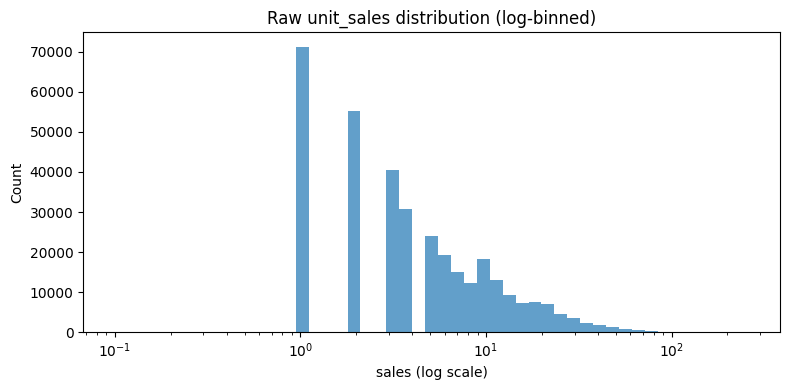

In [12]:
# Plotting the distribution of the 'sales' column with logarithmic binning
plt.figure(figsize=(8,4))
sns.histplot(
    df["sales"],
    bins=np.logspace(
        np.log10(max(df["sales"].min(), 1e-1)),
        np.log10(df["sales"].max()+1),
        50
    ),
    log_scale=False,   
    alpha=0.7
)
plt.xscale("log")
plt.xlabel("sales (log scale)")
plt.ylabel("Count")
plt.title("Raw unit_sales distribution (log‑binned)")
plt.tight_layout()
plt.show()

The distribution of daily unit sales is highly uneven. Most days have sales of only one to a few units, while fewer days reach tens or more than a hundred units. On a log scale this looks like a thick cluster at low sales with a long slow tail towards higher values. The small peaks come from sales being whole numbers. This heavy tail means that a few high-volume days add a big share of the total demand, so models that assume a normal or lightly skewed pattern can misinterpret the real variation.

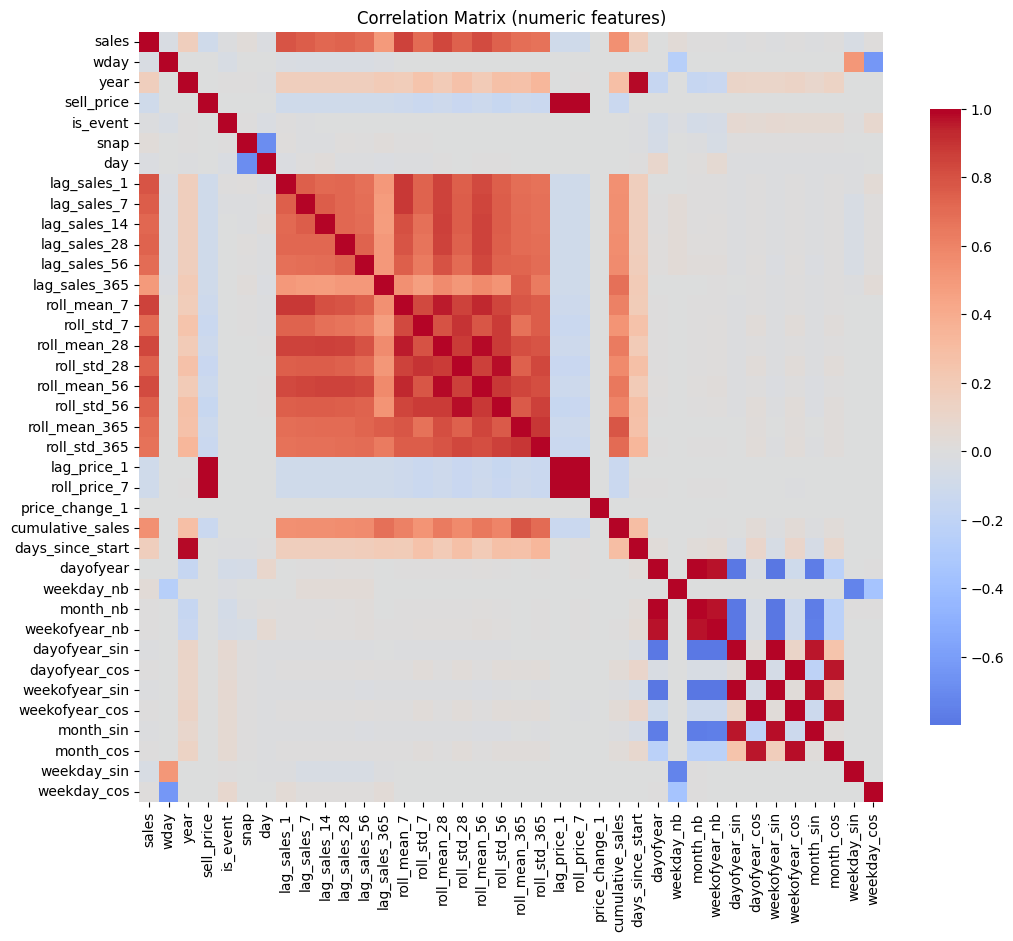

In [13]:
# Plotting the Correlation matirx for numeric features
numeric = df.select_dtypes(include=[np.number]).columns
corr = df[numeric].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, cbar_kws={"shrink":.8})
plt.title("Correlation Matrix (numeric features)")
plt.show()

The correlation heatmap shows how the main numbers in the M5 dataset are linked. Lag and rolling features have strong positive links, which means past sales and their variation move together and also match current sales. The sinusoidal calendar features make another clear group, which shows that the cycle based columns capture season patterns well. Price columns show weak or slightly negative links with sales, which is normal because demand usually goes down when price goes up. Year and days_since_start are strongly linked with each other and show long term changes but have less effect on demand. These points show that daily sales mainly depend on their own past values and repeating seasonal cycles, while price and long term trend matter less.

In [14]:
df["snap"].value_counts()

snap
0    641500
1    315000
Name: count, dtype: int64

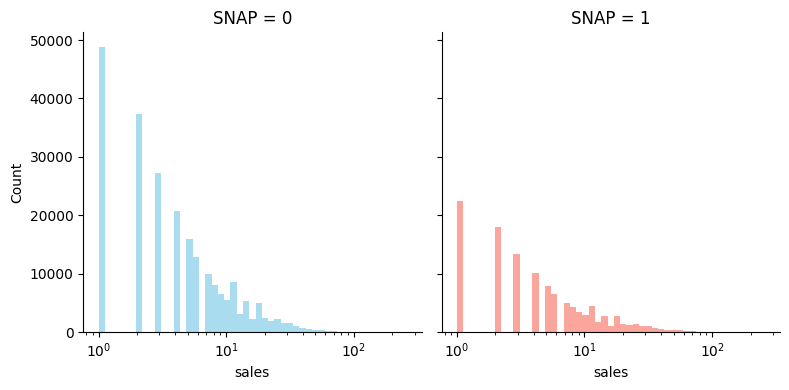

In [15]:
# Plotting sales on days with and without SNAP
max_sale = df.loc[df.sales > 0, "sales"].max()
bins     = np.logspace(0, np.log10(max_sale), 50)

g = sns.FacetGrid(df, col="snap", sharex=True, sharey=True, height=4, aspect=1)
for ax, snap_flag, color in zip(g.axes.flat, [0, 1], ["skyblue", "salmon"]):
    ax.hist(
        df.loc[df.snap == snap_flag, "sales"],
        bins=bins,
        color=color,
        alpha=0.7
    )
    ax.set_xscale("log")
    ax.set_title(f"SNAP = {snap_flag}")
    ax.set_xlabel("sales")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

The distribution of daily sales is different for SNAP and non-SNAP days. On days without SNAP benefits (SNAP = 0), sales counts are higher at all sales levels. On SNAP days (SNAP = 1), both the number of transactions and the usual daily sales are lower, though the long tail of high sales remains. This may be because there are far fewer SNAP days compared to normal days. This shows that SNAP status is an important factor to consider when modelling demand.

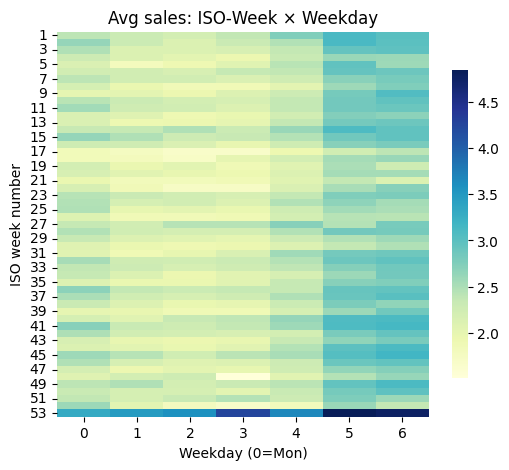

In [16]:
# Plotting average daily sales by week number and week day
pivot = df.pivot_table(
    index=df.date.dt.isocalendar().week,
    columns=df.date.dt.dayofweek,
    values="sales",
    aggfunc="mean"
)
plt.figure(figsize=(6,5))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={"shrink":.8})
plt.title("Avg sales: ISO‑Week × Weekday")
plt.xlabel("Weekday (0=Mon)")
plt.ylabel("ISO week number")
plt.show()

The heatmap shows average daily sales by week number on the y-axis and weekday on the x-axis (0 = Monday). Sales stay lowest early in the week and rise steadily towards Friday and Saturday, showing a clear end-of-week pattern. Some late-year weeks, especially around week 52–53, have higher sales across many weekdays because of holiday demand. Apart from these holiday peaks, the pattern stays fairly stable through the year. These points show that weekly shopping habits and seasonal peaks have a strong effect on daily demand, so both weekday and week number are important features for modeling.

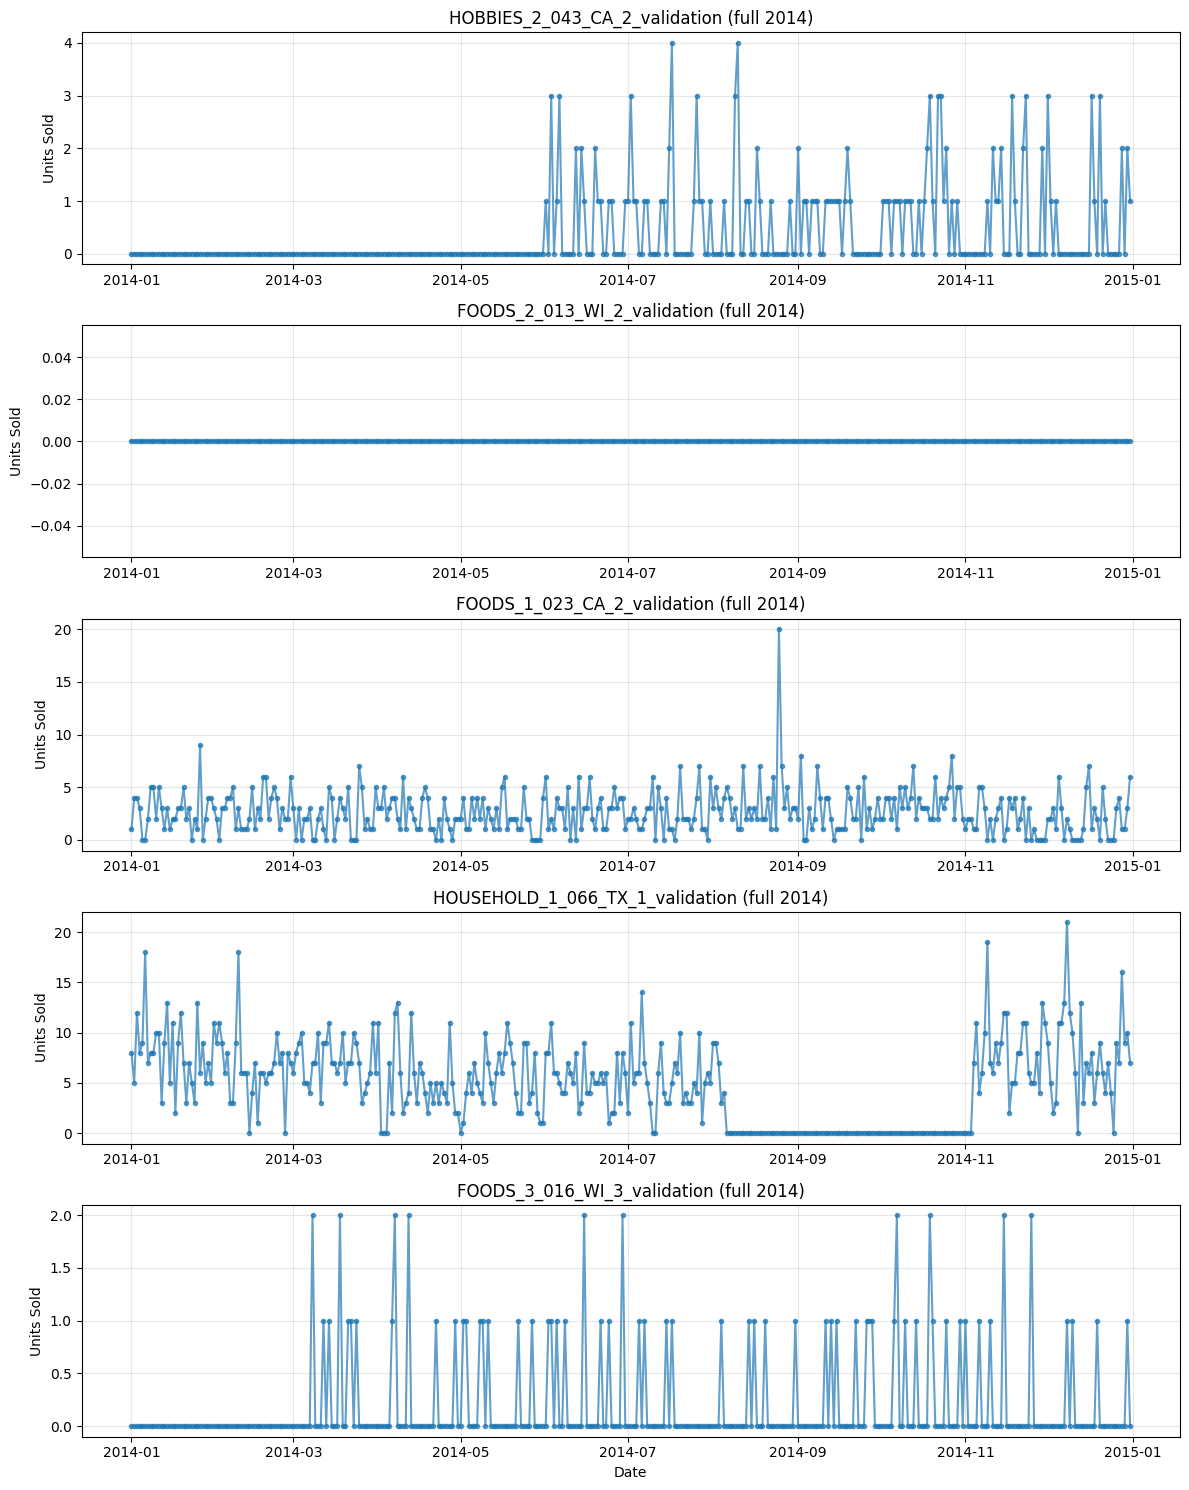

In [9]:
# Plotting daily sales for 5 random product-store combinations
df2014 = df[(df.date >= "2014-01-01") & (df.date < "2015-01-01")]

random.seed(42)
all_ids   = df2014["id"].unique().tolist()
sample_ids = random.sample(all_ids, 5)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 3*5), sharex=False)

for ax, sid in zip(axes, sample_ids):
    ts = df2014[df2014.id == sid].sort_values("date")
    ax.plot(ts.date, ts.sales, marker="o", linestyle="-", ms=3, alpha=0.7)
    ax.set_title(f"{sid} (full 2014)")
    ax.set_ylabel("Units Sold")
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

The figure shows daily sales in 2014 for five sample product–store series. Many days have zero sales, seen as long flat stretches in some panels like FOODS_2_013_WI_2 and FOODS_3_016_WI_3. Some series such as HOBBIES_2_043_CA_2 and FOODS_1_023_CA_2 show short sudden bursts of demand. HOUSEHOLD_1_066_TX_1 has a clear mid-year drop to zero and then picks up again, pointing to supply or listing changes. The overall sales levels also vary a lot, with some items never crossing a few units per day and others sometimes reaching 15–20 units. These patterns show that each series behaves differently in level and variation, and that demand is highly non-stationary across products and time.

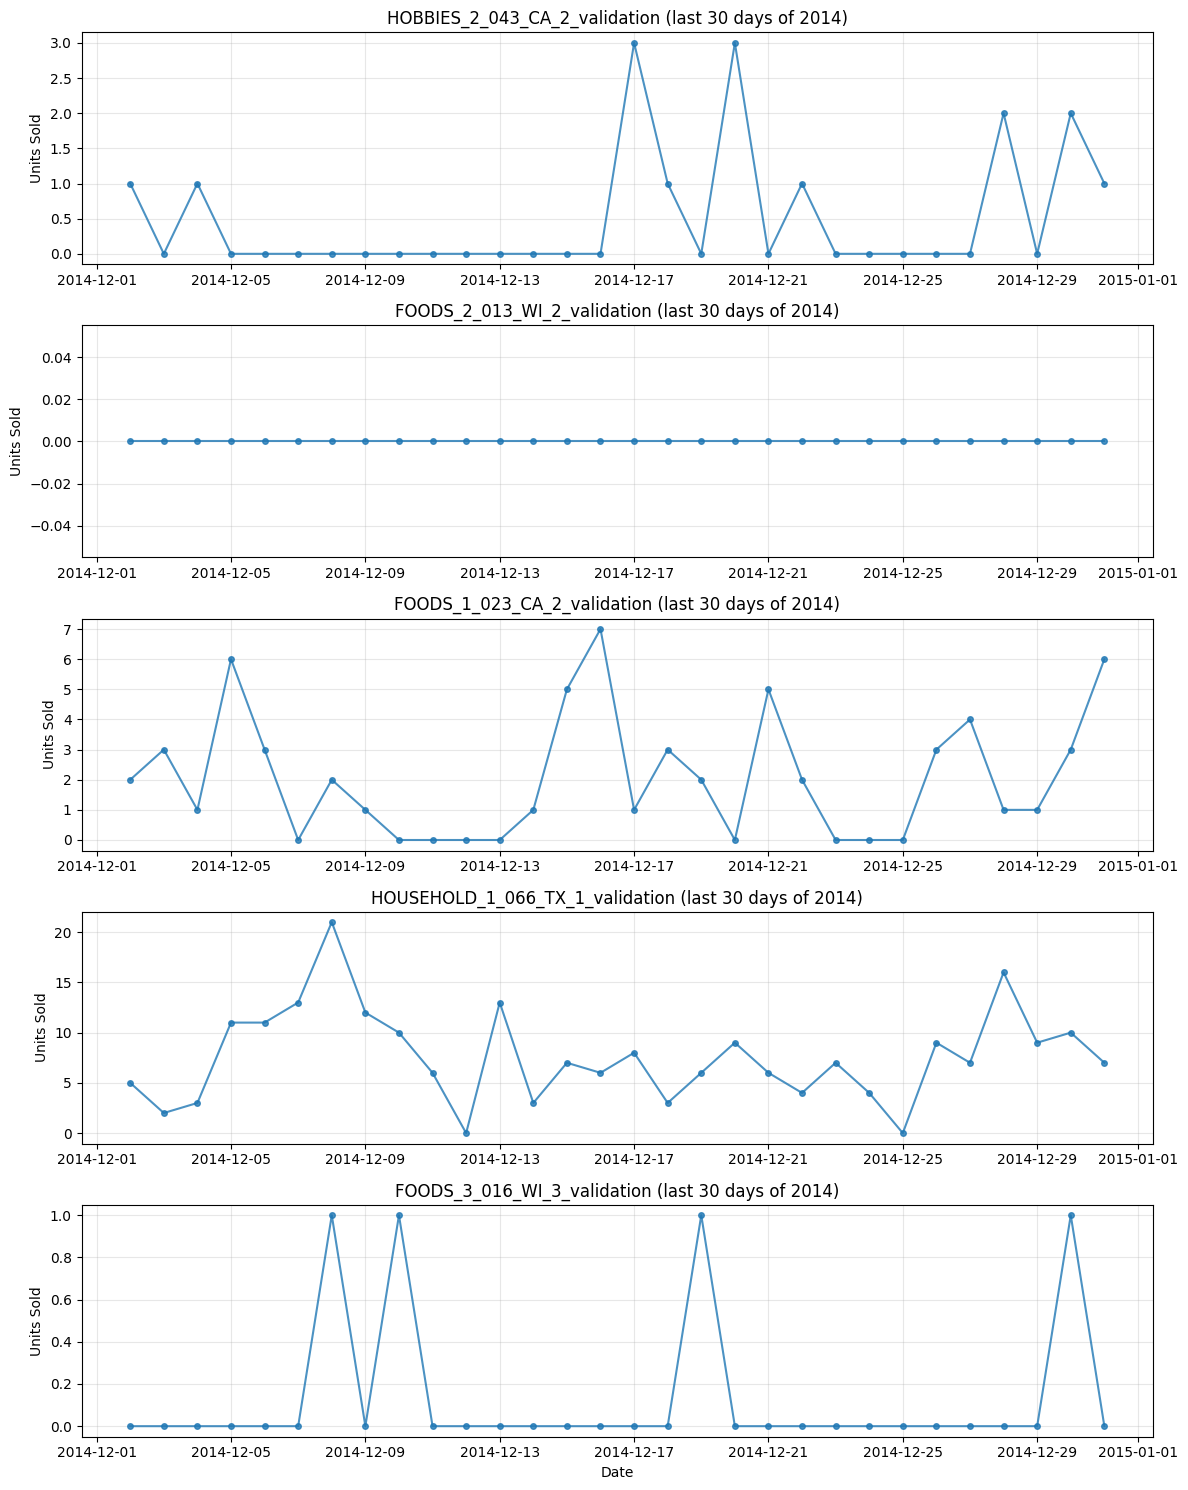

In [12]:
# Zooming in on the last 30 days of 2014 for the same samples
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 3*5), sharex=False)

for ax, sid in zip(axes, sample_ids):
    ts = df2014[df2014.id == sid].sort_values("date")
    end = ts.date.max()  # last available date
    last_month = ts[(ts.date > end - pd.Timedelta(days=30)) & (ts.date <= end)]
    ax.plot(last_month.date, last_month.sales, marker="o", linestyle="-", ms=4, alpha=0.8)
    ax.set_title(f"{sid} (last 30 days of 2014)")
    ax.set_ylabel("Units Sold")
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

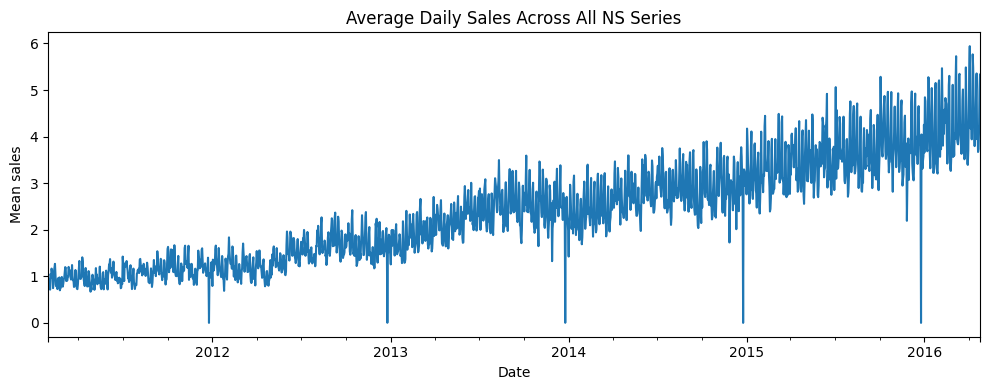

In [ ]:
# Plotting average daily sales across all series
plt.figure(figsize=(10,4))
daily = df.groupby("date")["sales"].mean()
daily.plot()
plt.title("Average Daily Sales Across All NS Series")
plt.xlabel("Date"); plt.ylabel("Mean sales")
plt.tight_layout()
plt.show()

The figure shows the average daily sales across all series in the dataset. Mean daily sales rise steadily from 2011 to 2016, showing long-term growth in overall demand. There are regular ups and downs within each year, pointing to clear weekly and yearly seasonal patterns. Sharp drops to near zero match holiday periods or missing records, which temporarily lower sales. The ups and downs also get bigger as the mean grows, which is common in non-stationary data. These points together show that the combined series has a strong trend, clear seasonal cycles, and changing variation, so inventory policies need to handle growth and seasonality well.

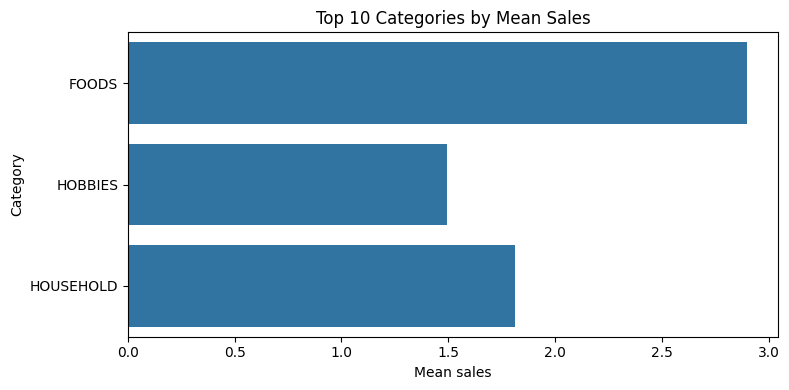

In [ ]:
# Plotting top 10 categories by mean sales
top_cats = df.groupby("cat_id")["sales"].mean().nlargest(10).index
plt.figure(figsize=(8,4))
sns.barplot(
    y="cat_id", x="sales",
    data=df[df.cat_id.isin(top_cats)].groupby("cat_id")["sales"].mean().reset_index()
)
plt.title("Top 10 Categories by Mean Sales")
plt.xlabel("Mean sales"); plt.ylabel("Category")
plt.tight_layout()
plt.show()

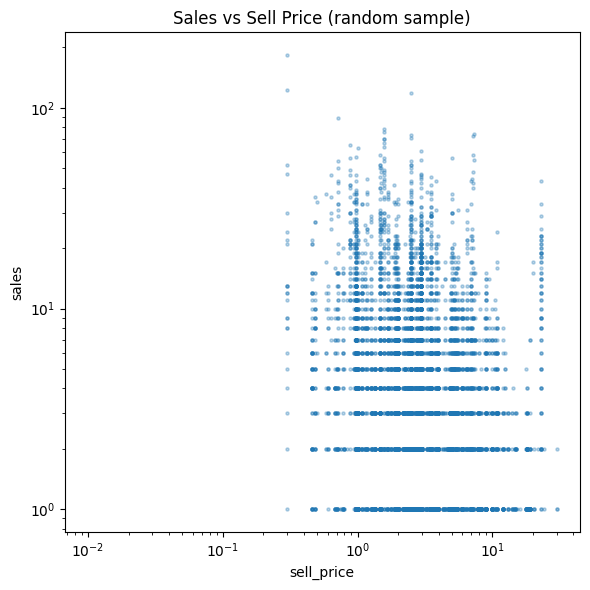

In [17]:
# Scatter plot of sales vs sell_price (log-log scale)
plt.figure(figsize=(6,6))
ix = df.sample(20000, random_state=1).index
plt.scatter(df.loc[ix,"sell_price"], df.loc[ix,"sales"], alpha=0.3, s=5)
plt.xscale("log"); plt.yscale("log")
plt.title("Sales vs Sell Price (random sample)")
plt.xlabel("sell_price"); plt.ylabel("sales")
plt.tight_layout()
plt.show()

The scatter plot compares daily sales with selling price on a double log scale for a random sample of records. Most high volume sales happen when prices are low, and higher prices usually lead to fewer units sold. At the same time, sales vary a lot at each price, which shows that other factors like events or seasonality also affect demand. Overall, the plot shows a clear negative price demand relationship with a lot of variation.

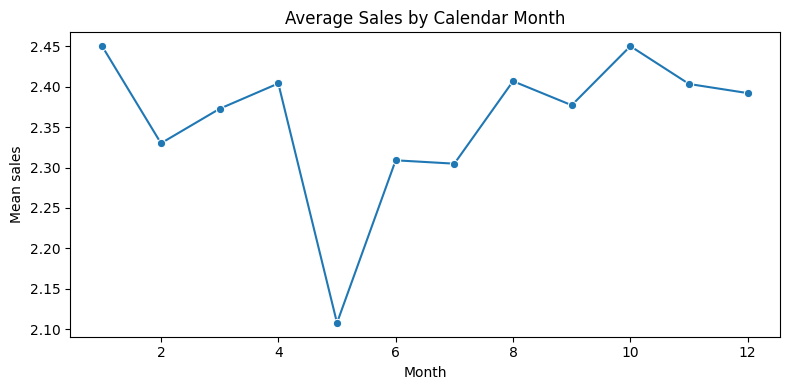

In [ ]:
# Plotting average sales by calendar month
plt.figure(figsize=(8,4))
monthly = df.assign(month=df.date.dt.month)\
            .groupby("month")["sales"].mean().reindex(range(1,13))
sns.lineplot(x=monthly.index, y=monthly.values, marker="o")
plt.title("Average Sales by Calendar Month")
plt.xlabel("Month"); plt.ylabel("Mean sales")
plt.tight_layout()
plt.show()

The plot shows how average daily sales change across the twelve calendar months. Sales are highest in January and again in October, with smaller rises in spring and late summer. May has the lowest average sales, and June to August slowly recover from that drop. Overall, the monthly averages stay within a narrow range but still show a clear seasonal pattern where early year and autumn months bring a bit more demand than late spring.

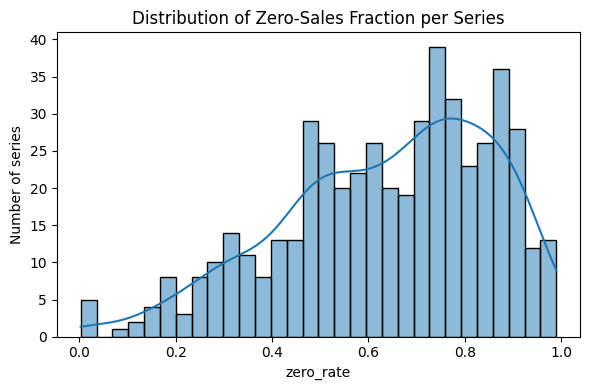

In [ ]:
# Plotting distribution of zero-sales fraction per series
zr = df.groupby("id")["sales"].apply(lambda x: (x==0).mean())
plt.figure(figsize=(6,4))
sns.histplot(zr, bins=30, kde=True)
plt.title("Distribution of Zero‑Sales Fraction per Series")
plt.xlabel("zero_rate"); plt.ylabel("Number of series")
plt.tight_layout()
plt.show()

The histogram shows how often products have zero sales. Each bar shows how many series have a certain share of days with zero demand. Most series have a high zero rate, with many above 0.6 and a big group near 0.8–0.9, which means they stay inactive on most days. Only a few series have a low zero rate and sell almost every day. This shows that irregular demand is common and should be kept in mind while planning inventory.

<Figure size 600x400 with 0 Axes>

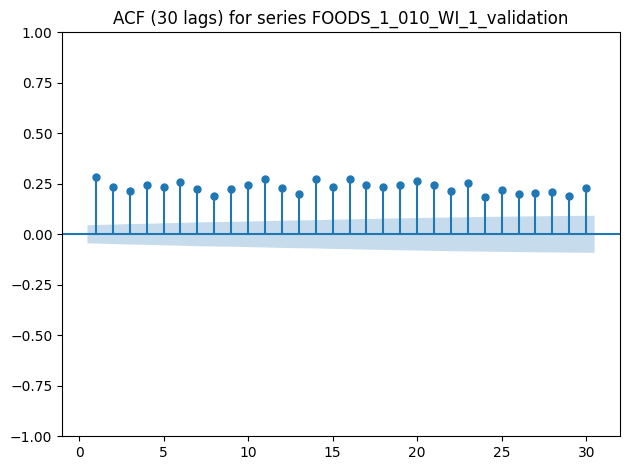

In [ ]:
# Plotting ACF for a random series
from statsmodels.graphics.tsaplots import plot_acf

rep = df[df.id==df.id.unique()[0]].set_index("date")["sales"].dropna().asfreq("D").fillna(0)
plt.figure(figsize=(6,4))
plot_acf(rep, lags=30, zero=False)
plt.title(f"ACF (30 lags) for series {df.id.unique()[0]}")
plt.tight_layout()
plt.show()

This ACF (autocorrelation function) plot shows how today’s sales for the series FOODS_1_010_WI_1_validation relate to sales on the previous 30 days (lags). Almost all lags have a positive value around 0.2–0.3, well above the shaded confidence band, which means sales stay positively linked to their past values even several weeks apart. There is no sharp weekly peak, so the dependence is steady rather than strongly seasonal. This pattern suggests that past sales levels influence future demand for this product in a gradual and persistent way.

/tmp/ipykernel_3844277/3944118023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_event", y="sales", data=ev, palette="pastel")


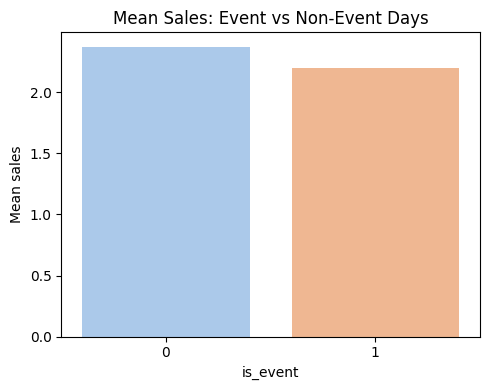

In [ ]:
# Plotting mean sales on event vs non-event days
ev = df.groupby("is_event")["sales"].mean().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x="is_event", y="sales", data=ev, palette="pastel")
plt.title("Mean Sales: Event vs Non‑Event Days")
plt.xlabel("is_event"); plt.ylabel("Mean sales")
plt.tight_layout()
plt.show()

The bar chart compares the average daily sales on normal days (0) and event days (1). Sales are slightly higher on normal days, with mean sales around 2.4 units, compared to about 2.2 units on event days. This means that, for the products studied, special events do not increase overall sales and may even reduce them a little, which is important when deciding how much stock to keep on event dates.

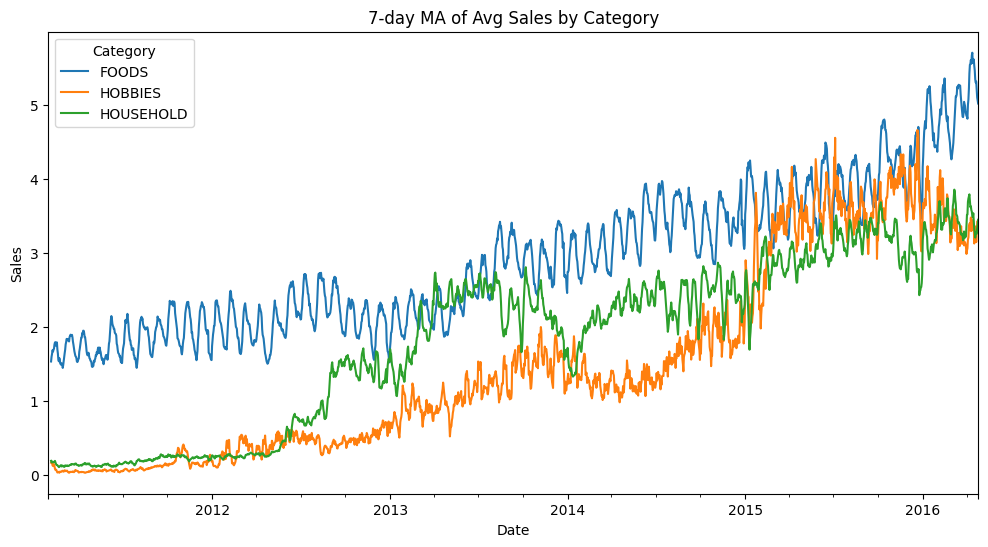

In [ ]:
# Plotting 7-day moving average of average sales by category
cat_ts = (df
  .groupby(["date","cat_id"])["sales"]
  .mean()
  .reset_index()
  .pivot(index="date", columns="cat_id", values="sales")
)

cat_ts.rolling(7).mean().plot(figsize=(12,6), legend=True)  
plt.title("7-day MA of Avg Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.legend(title="Category")  
plt.show()


The plot shows the 7-day moving average of average daily sales for each main category over the full period. All three category lines move upward, showing steady growth in demand. The blue line (FOODS) stays highest through most of the period and grows the fastest toward the end. The green and orange lines (HOUSEHOLD and HOBBIES) start much lower and rise later, with clear jumps. All categories show regular weekly waves and bigger seasonal peaks. This steady rise with strong weekly and seasonal patterns confirms long-term growth and clear seasonality in category-level demand.

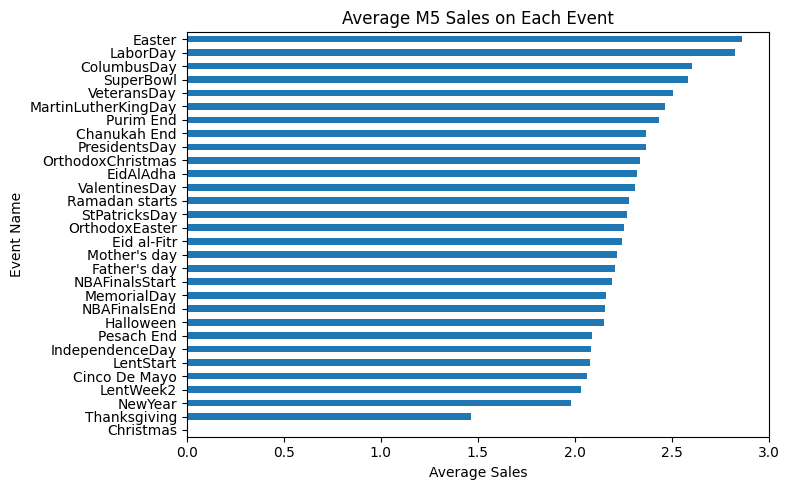

In [ ]:
# Analyzing average sales on different events
import pandas as pd
import matplotlib.pyplot as plt

# Identifying the one‑hot columns for event_name_1
ev1_cols = [c for c in df.columns if c.startswith("event_name_1_")]

# 2) Computing average sales for each event
mean_sales = {
    col.replace("event_name_1_", ""):  
    df.loc[df[col] == 1, "sales"].mean()
    for col in ev1_cols
}

mean_sales = pd.Series(mean_sales).sort_values()

plt.figure(figsize=(8,5))
mean_sales.plot(kind="barh")
plt.title("Average M5 Sales on Each Event")
plt.xlabel("Average Sales")
plt.ylabel("Event Name")
plt.tight_layout()
plt.show()

Easter, Labor Day, Columbus Day and Super Bowl top the list with the highest mean sales, all around or above 2.5 units.
Events such as Christmas, New Year and Thanksgiving are at the lower end, closer to 1–1.5 units. This might be because most people sepnd these holidays with their family and friends, and hence the sales might drop during these days.
Many other holidays and special days lie in between.

This means that not all popular festivals or holidays drive high sales. Some less expected events like Easter or Labor Day bring more average demand than big festivals such as Christmas. This information can help in planning stock and promotions for different types of events.

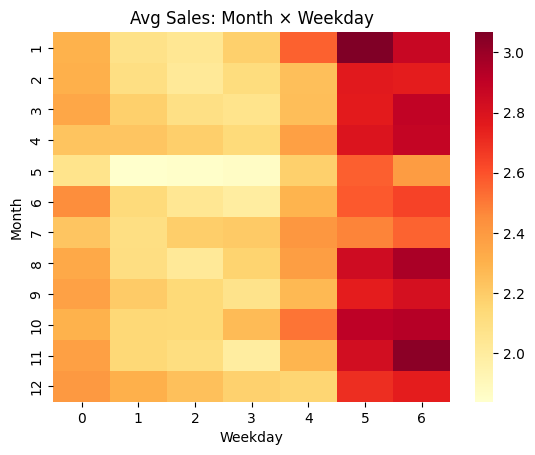

In [20]:
pivot = df.pivot_table(index=df.date.dt.month, 
                       columns=df.date.dt.dayofweek,
                       values="sales", aggfunc="mean")
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Avg Sales: Month × Weekday")
plt.xlabel("Weekday"); plt.ylabel("Month")
plt.show()

Sales are lowest on Mondays and Tuesdays and rise towards Friday and Saturday across almost all months. The darkest shades appear on weekends in October, November, and December, showing stronger year-end demand. May shows lighter shades overall, matching the earlier finding of lower sales in that month. This combined view highlights how weekly patterns and month-to-month seasonality work together to shape daily demand.

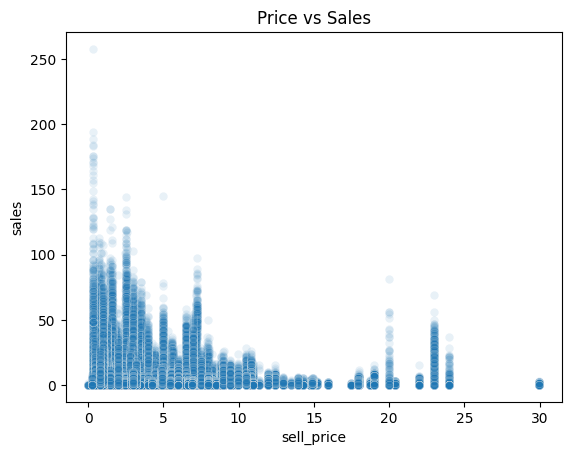

In [17]:
# Plotting sell_price vs sales
sns.scatterplot(x="sell_price", y="sales", data=df, alpha=0.1)
plt.title("Price vs Sales")
plt.show()

The scatter plot shows the link between selling price and daily sales on a log–log scale. Most of the high sales happen when the price is low, and sales slowly thin out as the price goes up. At the same time, sales vary a lot for the same price, which means other things like offers or seasonal effects also play a role. Overall, the plot makes it clear that demand usually goes down as price increases, but price alone does not fully explain the sales.

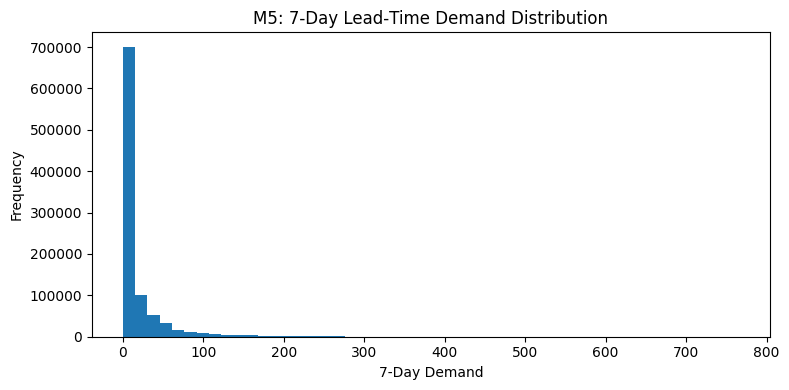

In [ ]:
# Calculating and plotting 7-day lead-time demand distribution
def compute_ltd(df, grp_cols, demand_col, date_col, L):
    sums = []
    for _, grp in df.groupby(grp_cols):
        grp = grp.sort_values(date_col)
        arr = grp[demand_col].to_numpy()
        if len(arr) >= L:
            window_sums = np.convolve(arr, np.ones(L, dtype=int), mode='valid')
            sums.extend(window_sums)
    return np.array(sums)

m5 = df.copy()

L = 7
m5_ltd = compute_ltd(m5,['store_id','item_id'], 'sales', 'date', L)

plt.figure(figsize=(8,4))
plt.hist(m5_ltd, bins=50)
plt.title("M5: 7‑Day Lead‑Time Demand Distribution")
plt.xlabel("7‑Day Demand")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Lastly, this histogram shows the 7-day lead-time demand across all series. Most values are very small, with a sharp peak near zero and only a few cases above 100 units. The long thin tail on the right means that sometimes very high 7-day demand occurs, but such cases are rare. This tells that weekly demand is usually low but can occasionally shoot up, which is important to keep in mind while planning stock and safety levels.